<a href="https://colab.research.google.com/github/Angelaestefan/concentracion/blob/master/7_Estimacion_de_locacion_y_variabilidad_%5BPUBLIC%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estimaciones de localización

 Las variables con datos medidos o de recuento pueden tener miles de valores distintos.

 Un paso básico en la exploración de sus datos es obtener un **valor típico** para cada característica (variable): una estimación de dónde se encuentra la mayoría de los datos (es decir, su **tendencia central**).

In [74]:
import pandas as pd
import numpy as np

In [75]:
URL = "https://raw.githubusercontent.com/Ahmiii/Practical-Statistics-For-Data-Scientist-50-Essiential-Concept/refs/heads/master/state.csv"
data=pd.read_csv(URL)

In [76]:
# Imprime los primeros elementos de la tabla
data.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [77]:
data.dtypes

State            object
Population        int64
Murder.Rate     float64
Abbreviation     object
dtype: object

In [78]:
data.State.value_counts().sum().item()

50

Podemos calcular la **media** y la **mediana** de la poblacion (`Population`) a traves de los métodos incluidos  `pandas` del `dataframe`. i.e., `.mean()` y `.median()`.

In [79]:
# Tu codigo va aqui
meandata = data.mean(numeric_only=True)
print("Data mean:", meandata)

Data mean: Population     6162876.300
Murder.Rate          4.066
dtype: float64


In [80]:
# Tu codigo va aqui
data.median(numeric_only=True)

Population     4436369.5
Murder.Rate          4.0
dtype: float64

La **media recortada** (Trimmed mean) requiere la función **`trim_mean`** en **`scipy.stats`**, podemos utilizar la variable `proportiontocut` para elegir la proporcion a cortar:

In [81]:
from scipy import stats

In [82]:
# Tu codigo va aqui
trimmed_mean_population = stats.trim_mean(data['Population'], proportiontocut=0.1)
print("Trimmed mean (Population, 10%):", trimmed_mean_population)

trimmed_mean_murder_rate = stats.trim_mean(data['Murder.Rate'], proportiontocut=0.1)
print("Trimmed mean (Murder.Rate, 10%):", trimmed_mean_murder_rate)

Trimmed mean (Population, 10%): 4783697.125
Trimmed mean (Murder.Rate, 10%): 3.9450000000000003


La **media** es mayor que la **media recortada** (Trimmed mean), que es mayor que la **mediana**.

Esto se debe a que la **media recortada** excluye los valores más grandes y más pequeños (elimina un porcentaje de cada extremo). Si queremos calcular la **tasa media** de homicidios del país, tenemos que utilizar una **media ponderada** o una **mediana** para tener en cuenta las diferentes poblaciones de los estados.

 La **media ponderada** está disponible con **`NumPy`**.


In [83]:
np.average(data['Murder.Rate'], weights=data.Population).item()

4.445833981123393

Para la **mediana ponderada** (Weighted median), podemos utilizar el paquete especializado **`wquantiles`**, donde podemos encontrar la funcion `.median()`, donde tenemos la variable `weights` para calcular la ponderacion de acuerdo con la poblacion:

In [84]:
try:
    import wquantiles
except ImportError:
    %pip install wquantiles
    import wquantiles

In [85]:
# Tu codigo va aqui
weighted_median_murder_rate = wquantiles.median(data['Murder.Rate'], weights=data.Population).item()
print(weighted_median_murder_rate)

4.4


En este caso, la **media ponderada** y la **mediana ponderada** son prácticamente iguales.

---

# Estimaciones de Variabilidad
El dataframe de `pandas` proporciona métodos para calcular la **desviación estándar** y los **cuantiles**.

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

Empecemos con la funcion de calculo de la **desviación estándar** para la **poblacion** (`population`) , podemos utilizar la funcion nativa `.std()` de `pandas`:

In [87]:
# Tu codigo va aqui
data['Population'].std()

np.float64(6848235.347401142)

 Para la **Desviacion Absoluta de la Mediana** (MAD) robusta para la **poblacion** (`population`), utilizamos la función `robust.scale.mad` de la libreria `statsmodels`:

In [88]:
from statsmodels import robust

In [89]:
# Tu codigo va aqui
mad_population = robust.scale.mad(data['Population'])
print("MAD robusta para la población:", mad_population)

MAD robusta para la población: 3849876.1459979336


La **desviación estándar** es casi dos veces mayor que la **MAD**. Esto no es sorprendente, ya que la **desviación típica** es sensible a los valores atípicos (*outliers*).



---

# Explorar la distribución de los datos

Cada una de las estimaciones que hemos cubierto resume los datos en un único número para describir la **localización** o **variabilidad** de los datos. También es útil explorar cómo se **distribuyen** los datos en general.

## Percentiles y Boxplots

Hemos explorado cómo se pueden utilizar los **percentiles** para medir la **dispersión de los datos**. Los **percentiles** también son valiosos para resumir toda la distribución. Es común informar de los **cuartiles** (percentiles 25, 50 y 75) y los **deciles** (percentiles 10, 20, ..., 90).

Los **percentiles** son especialmente valiosos para resumir las colas (el rango exterior) de la distribución.

Por ejemplo, La cultura popular ha acuñado el término **"unos por cientos"** (one-percenters) para referirse a las personas que se encuentran en el **percentil 99** de riqueza.

Podemos mostrar algunos **percentiles** de la *tasa de homicidios por estado*. El método **`.quantile()`** del *dataframe* de **`pandas`** lo proporciona en Python, que puede recibir una lista de los cuantiles que queremos ver.

Apliquemos esta herramienta para ver la distribucion del **`Murder.Rate`** en los conjuntos de datos para los cuantiles `[0.05, 0.25, 0.5, 0.75, 0.95]`:

In [90]:
# Tu codigo va aqui
percentiles = [0.05, 0.25, 0.5, 0.75, 0.95]
data['Murder.Rate'].quantile(percentiles)

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Con esta herramienta es que la **mediana** es de 4 asesinatos por cada 100,000 habitantes, aunque hay bastante variabilidad, lo podemos ver comparando del percentil 5 al percentil 95.

Los **gráficos de caja** (**box plots**) se basan en los **percentiles** y permiten visualizar rápidamente la distribución de los datos.

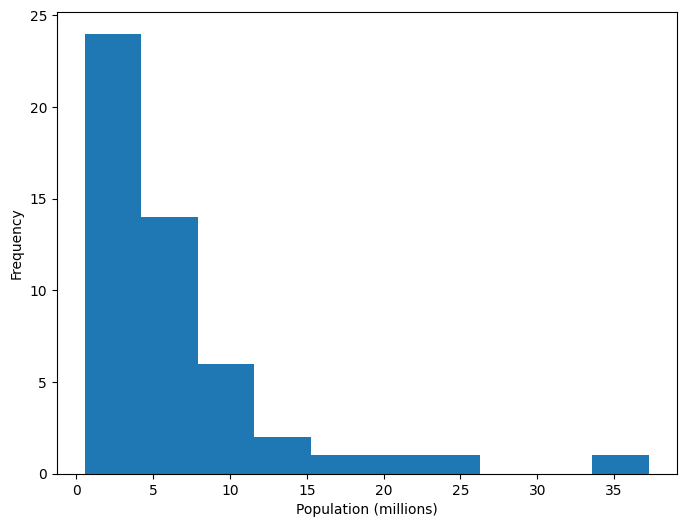

In [91]:
ax = (data['Population'] / 1_000_000).plot.hist(figsize=(8, 6))
ax.set_xlabel('Population (millions)')
plt.show()

La libreria `pandas` tambien cuenta con la funcion **`.plot.box()`**. Muestra la distribucion de la poblacion (`Population`) en escala en **millones**, originalmente los datos no tienen una escala:

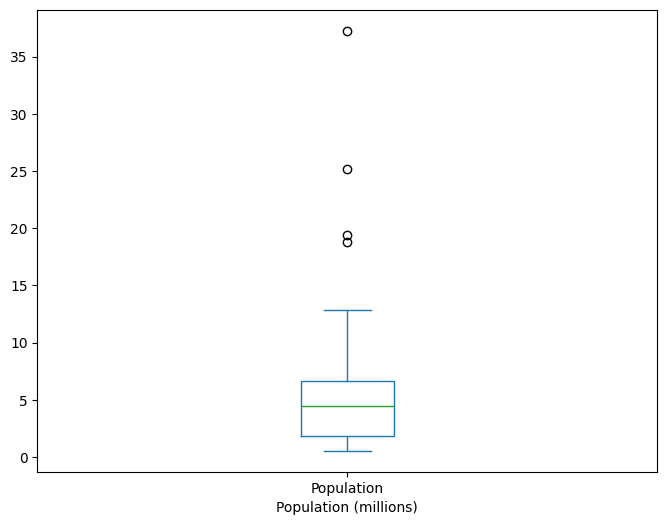

In [92]:
# Tu codigo va aqui
ax = (data['Population'] / 1_000_000).plot.box(figsize=(8, 6))
ax.set_xlabel('Population (millions)')
plt.show()


De este **boxplot** se desprende inmediatamente que la **población media** de los estados ronda los 5 millones, que la mitad de los estados se sitúan entre los 2 y los 7 millones, y que hay algunos valores atípicos (*outliers*) de población elevada.

La parte superior e inferior del recuadro son los **percentiles** 75 y 25, respectivamente.

La **mediana** es la línea horizontal del recuadro.

Las líneas discontinuas (líneas verticales), denominadas bigotes (*whiskers*), se extienden desde la parte superior e inferior del recuadro para indicar el intervalo de la mayor parte de los datos.  Los datos que quedan fuera de los *bigotes* se representan como puntos aislados o círculos (a menudo considerados *valores atípicos*).

Ahora intentemos realizar el mismo ejercicio pero ahora aplicado al **`Murder.Rate`**:

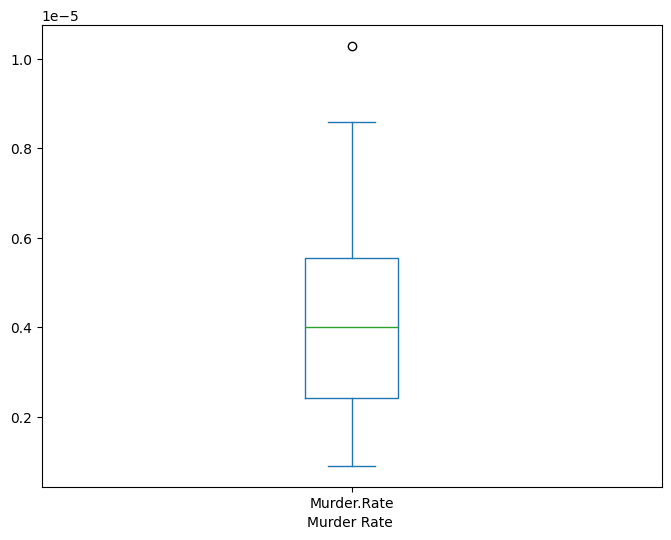

In [93]:
# Tu codigo va aqui
ax = (data['Murder.Rate'] / 1_000_000).plot.box(figsize=(8, 6))
ax.set_xlabel('Murder Rate ')
plt.show()

## Metodos de deteccion de outliers

A continuación, utilicemos dos metodologias para poder detectar ouliers:
* Rango Intercuartil (IQR)
* Desviacion estándar

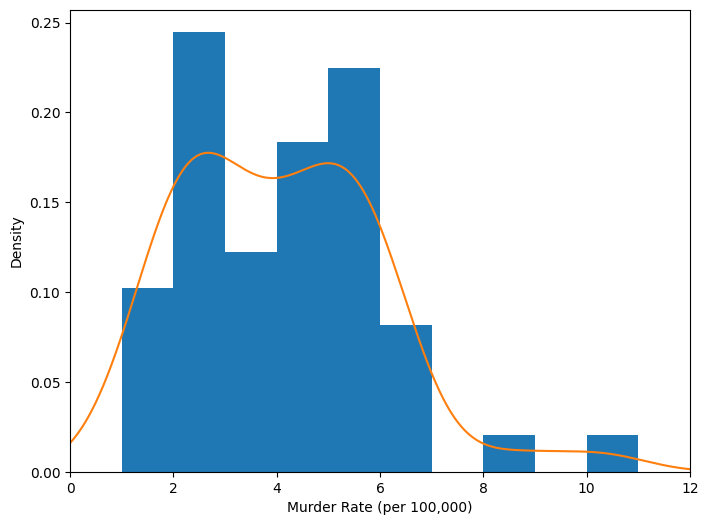

In [94]:
plt.figure(figsize=(8, 6))
ax = data["Murder.Rate"].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
data["Murder.Rate"].plot.density(ax=ax)
ax.set_xlabel("Murder Rate (per 100,000)")
plt.show()

Recordemos que para calcular rango intercuartil (IQR) es necesario saber el cuartil 3 (Q3) y el cuartil 1 (Q1):
$$
IQR = Q3 - Q1
$$

Recordemos tambien que para encontrar la cota superior y la inferior es necesario calcular:
$$
Upper = Q3 + 1.5 \times IQR
$$

$$
Lower = Q1 - 1.5 \times IQR
$$

In [95]:
# Tu codigo va aqui
q3 = data['Murder.Rate'].quantile(0.75)
q1 = data['Murder.Rate'].quantile(0.25)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print("Límite superior:", upper_bound)
print("Límite inferior:", lower_bound)

Límite superior: 10.2375
Límite inferior: -2.2625


una vez obtenido las cotas superiores e inferiores, filtre de los datos aquella columnas que esten fuera de estas cotas para descubrir los outliers:

In [96]:
# Tu codigo va aqui
outliers_iqr = data[(data['Murder.Rate'] < lower_bound) | (data['Murder.Rate'] > upper_bound)]
print(outliers_iqr)

        State  Population  Murder.Rate Abbreviation
17  Louisiana     4533372         10.3           LA


Para el metodo de la desviacion estandar recordemos que la cota superior y la inferior se calcula como:
$$
Upper = \bar{x} + k \times \sigma
$$

$$
Lower = \bar{x} - k \times \sigma
$$

tradicionalmente, $k=3$ para la deteccion de outliers.

In [116]:
# Tu codigo va aqui
k= 3
mean_murder_rate = data['Murder.Rate'].mean()
std_murder_rate = data['Murder.Rate'].std()

upper_std_bound = mean_murder_rate + (k * std_murder_rate)
lower_std_bound = mean_murder_rate - k * std_murder_rate

print("Cota superior (desviación estándar):", upper_std_bound)
print("Cota inferior (desviación estándar):", lower_std_bound)


Cota superior (desviación estándar): 9.813208372908768
Cota inferior (desviación estándar): -1.6812083729087686


Compare el valor de las cotas superiores e inferiores calculados por los dos metodos.

<br>

Nuevamente, filtre de los datos aquella columnas que esten fuera de estas cotas para descubrir los outliers:

In [117]:
# Tu codigo va aqui
outliers_iqr = data[(data['Murder.Rate'] < lower_std_bound) | (data['Murder.Rate'] > upper_std_bound)]
print(outliers_iqr)

        State  Population  Murder.Rate Abbreviation
17  Louisiana     4533372         10.3           LA


---
---
---
# PART 2

# Transformacion de variables

In [100]:
from scipy.stats import norm, uniform, skewnorm
import numpy as np
import matplotlib.pyplot as plt

## Distribuciones asimetricas (sesgado a la derecha - positiva)

A continuacion se muestra el histrograma de la distribucion de 10,000 muestras sesgada a la derecha.

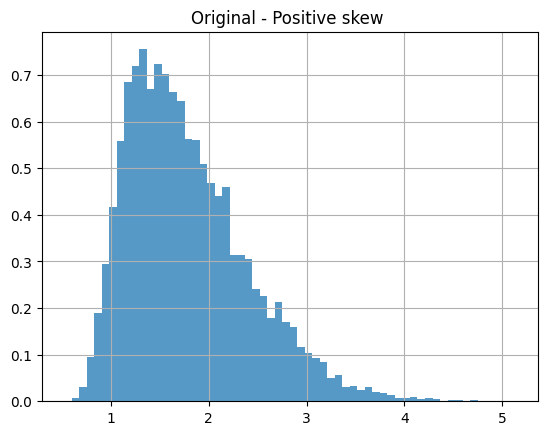

In [101]:
dist_post_skew = skewnorm.rvs(6, size=10000) + 1.0

plt.hist(dist_post_skew, density=True, bins='auto', histtype='stepfilled', alpha=0.75)
plt.title("Original - Positive skew ")
plt.grid()
plt.show()

Para intentar llegar a una forma más simétrica, aplique la transformacion con la **`raíz cuadrada`**. Si aplica, tome precauciones necesarias de compatibilidad de la transformacion con los valores posibles en los datos.

In [ ]:
# Tu codigo va aqui


Para intentar llegar a una forma más simétrica, aplique la transformacion con **`log`**. Si aplica, tome precauciones necesarias de compatibilidad de la transformacion con los valores posibles en los datos.

In [103]:
# Tu codigo va aqui

## Distribuciones asimetricas (sesgado a la izquierda - negativa)

A continuacion se muestra el histrograma de la distribucion de 10,000 muestras sesgada a la izquierda.

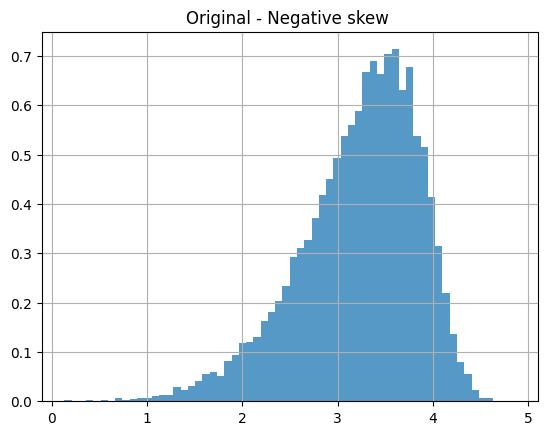

In [104]:
dist_neg_skew = skewnorm.rvs(-4, size=10000) + 4.0

plt.hist(dist_neg_skew, density=True, bins='auto', histtype='stepfilled', alpha=0.75)
plt.title("Original - Negative skew ")
plt.grid()
plt.show()

Para intentar llegar a una forma más simétrica, aplique la transformacion con la **`raíz cuadrada`**. Si aplica, tome precauciones necesarias de compatibilidad de la transformacion con los valores posibles en los datos.

In [105]:
# Tu codigo va aqui

Para intentar llegar a una forma más simétrica, aplique la transformacion con **`log`**. Si aplica, tome precauciones necesarias de compatibilidad de la transformacion con los valores posibles en los datos.

In [106]:
# Tu codigo va aqui

# BOX-COX

Vamos a hacer un ejemplo en Python paso a paso con **`scipy.stats.boxcox`**:

* Generamos datos positivos → aplicamos Box-Cox.

* Mostramos cómo invertir la transformación (para volver a los datos originales).

* Intentamos aplicar Box-Cox a datos con valores negativos → veremos el error que aparece.

In [107]:
from scipy.stats import norm, boxcox
from scipy.special import inv_boxcox
import statsmodels.api as sm

A continuacion se muestra el histrograma de la distribucion sesgada a la derecha. En este caso nos aseguramos que los valores fueran positivos.

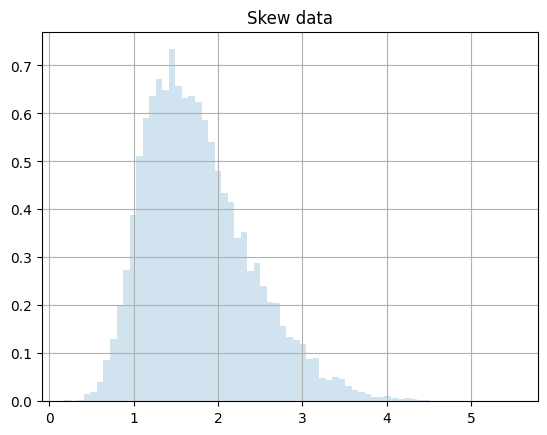

In [108]:
# Aplicar transformacion Box-Cox a cada caracteristicas y guardar sus lambdas
skew_data = skewnorm.rvs(4, size=10000) + 1.0

plt.hist(skew_data, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.title("Skew data")
plt.grid()
plt.show()

Tambien mostramos como se distribuyen los datos respecto a una distribucion normal a traves de un grafico Q-Q.

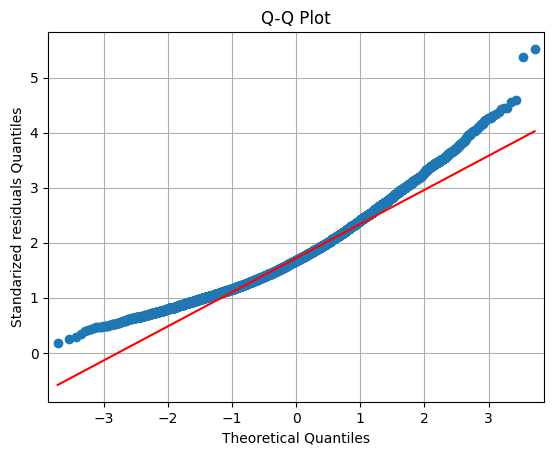

In [109]:
fig = sm.qqplot(data=skew_data, dist=norm, line="q")
plt.title("Q-Q Plot")
plt.ylabel("Standarized residuals Quantiles")
plt.grid()
plt.show()

La transformación de Box-Cox transforma los datos no-normales en datos más parecidos a una distribución normal.

En `SciPy`, podemos usar la funcion `scipy.stats.boxcox` para aplicar la transformación. La funcion regresa 2 paramentros: los `datos transformados` y el valor de las `lambdas`.

**Obtenga los valores transformados, el valor de lambda(s) calculado y muestre el histograma y la grafica QQ de los datos transformados.**

In [110]:
# Tu codigo va aqui

In [111]:
# Tu codigo va aqui

Existe la función `scipy.special.inv_boxcox` que permite invertirla de manera directa.


**Obtenga la transformacion inversa de los valores (utilice el valor de lambda obtenidos anteriormente). Muestre el histograma y la grafica QQ de los datos transformados.** Nombre la variable que utilice como **`original_data_recovered`**.

In [112]:
# Tu codigo va aqui

In [113]:
# Tu codigo va aqui

A continuacion, verificamos que es igual (con un pequeño error numérico) los datos sesgados originales y los datos obtenidos en la transformacion inversa.

In [114]:
print("¿Coinciden los datos originales e invertidos?", np.allclose(skew_data, original_data_recovered))

NameError: name 'original_data_recovered' is not defined

Por ultimo, verifique que pasa si se intenta transformar datos que contienen valores negativos con la funcion Box Cox:

In [ ]:
# Tu codigo va aqui

# Yeo-Johnson

A continuacion se muestra el histrograma de la distribucion sesgada a la derecha. Note que en este caso la distribucion contiene valores negativos.

In [ ]:
# Aplicar transformacion Box-Cox a cada caracteristicas y guardar sus lambdas
skew_data_neg = skewnorm.rvs(4, size=10000)

plt.hist(skew_data_neg, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.title("Original Skew Data")
plt.grid()
plt.show()

Tambien mostramos como se distribuyen los datos respecto a una distribucion normal a traves de un grafico Q-Q.

In [ ]:
fig = sm.qqplot(data=skew_data_neg, dist=norm, line="q")
plt.title("Q-Q Plot")
plt.ylabel("Standarized residuals Quantiles")
plt.grid()
plt.show()

Sí implementa **Yeo-Johnson** puede utilizar `sklearn`, usando `sklearn.preprocessing.PowerTransformer`. Actualmente, `PowerTransformer` es compatible con la transformación de **Box-Cox** y la transformación de **Yeo-Johnson**.

```
pt = PowerTransformer(method='yeo-johnson', standardize=False)

transformed_data = pt.fit_transform(X)
```

**Obtenga la transformacion Yeo-Johnson de los valores. Muestre el histograma y la grafica QQ de los datos transformados.**

**Nota 1.** Es posible que tenga que usar el metodo `.reshape()` en los datos para utilizar el metodo `.fit_transform()`.

**Nota 2.** Para la grafica QQ es posible que tenga que aplicar el metodo `.flatten()` en los datos para que la grafica se muestre adecuadamente.

In [ ]:
from scipy.stats import yeojohnson
from sklearn.preprocessing import PowerTransformer

In [ ]:
# Tu codigo va aqui

In [ ]:
# Tu codigo va aqui

**Obtenga la transformacion inversa de los valores (utilice el valor de lambda obtenidos anteriormente). Muestre el histograma y la grafica QQ de los datos transformados.**

En `SciPy` existe `scipy.special.inv_boxcox` para invertir la transformación **Box-Cox**, pero para **Yeo-Johnson** no hay una función directa de "inversa" en el mismo paquete.

Lo que se hace es usar el método `.inverse_transform()` del objeto entrenado, que aplica internamente la inversa.  Nombre la variable que utilice como **`original_data_recovered`**.

In [ ]:
# Tu codigo va aqui

In [ ]:
# Tu codigo va aqui

In [ ]:
# Verificamos que es igual (con un pequeño error numérico)
print("¿Coinciden los datos originales e invertidos?", np.allclose(skew_data_neg, original_data_recovered.flatten()))

Alternativamente, tambien existe el metodo `._yeo_johnson_inverse_transform(X, pt.lambdas_)`[*](https://github.com/scikit-learn/scikit-learn/blob/c5497b7f7/sklearn/preprocessing/_data.py#L3412) que aplica la transformacion a los datos `X` utilizando las `lambdas` del objeto entrenado `pt`.  Nombre la variable que utilice como **`original_data_recovered`**.

In [ ]:
# Tu codigo va aqui

In [ ]:
# Verificamos que es igual (con un pequeño error numérico)
print("¿Coinciden los datos originales e invertidos?", np.allclose(skew_data_neg, original_data_recovered.flatten()))